# Stroke Prediction 

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

<strong>Context</strong>

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

<strong>Attribute Information</strong>

1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient<br>


## Library imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, f1_score, accuracy_score

## Load the dataset and verify the dataload

In [2]:
strokedf = pd.read_csv("resources\healthcare-dataset-stroke-data.csv")

# Check the initial rows
strokedf.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Lets check the datastructure
strokedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Check for missing values

strokedf.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 missing values in bmi... which needs to be imputed

### Missing value treatment for 'bmi' attribute

The approach is to substitue mean of the bmi by the target variable - stroke

In [5]:
strokedf['bmi'] = strokedf['bmi'].fillna(strokedf.groupby('stroke')['bmi'].transform('mean'))

# Check whether imputations are done
strokedf.isna().sum()

# Another alternate approach

# strokedf["bmi"] = strokedf.groupby("stroke").transform(lambda x: x.fillna(x.mean()))

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Exploratory Data Analysis

#### stroke attribute

0    4861
1     249
Name: stroke, dtype: int64

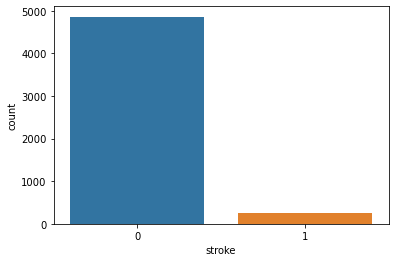

In [6]:
# Explore the target variable

sns.countplot(strokedf['stroke'])

strokedf['stroke'].value_counts()

we are looking at an unbalanced dataset with low presence of 'stroke' data

#### exploration  - gender, hypertension and heart_disease attributes

In [7]:
print("Gender by the target variable")
print(strokedf.groupby('stroke')['gender'].value_counts())
print("\n")
print("hypertension by the target variable")
print(strokedf.groupby('stroke')['hypertension'].value_counts())
print("\n")
print("heart_disease by the target variable")
print(strokedf.groupby('stroke')['heart_disease'].value_counts())

Gender by the target variable
stroke  gender
0       Female    2853
        Male      2007
        Other        1
1       Female     141
        Male       108
Name: gender, dtype: int64


hypertension by the target variable
stroke  hypertension
0       0               4429
        1                432
1       0                183
        1                 66
Name: hypertension, dtype: int64


heart_disease by the target variable
stroke  heart_disease
0       0                4632
        1                 229
1       0                 202
        1                  47
Name: heart_disease, dtype: int64


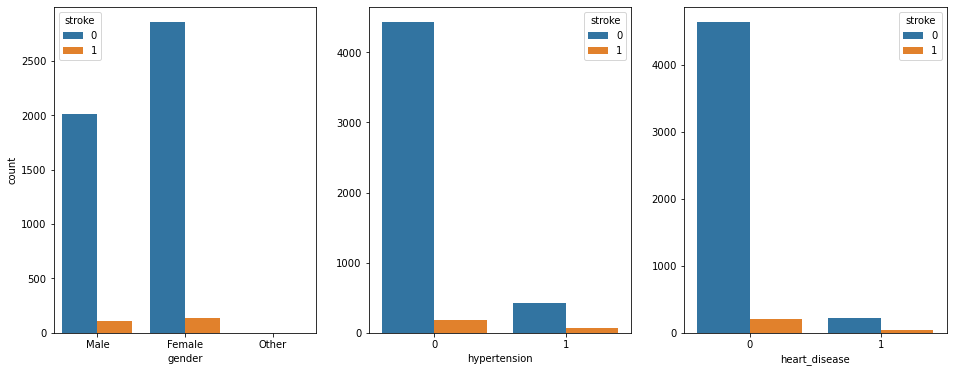

In [8]:

# Doing the visualizations

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,6))
sns.countplot(x='gender', hue='stroke', data=strokedf, ax=ax1);
sns.countplot(x='hypertension', hue='stroke', data=strokedf, ax=ax2);
ax2.set_ylabel("")
sns.countplot(x='heart_disease', hue='stroke', data=strokedf, ax=ax3);
ax3.set_ylabel("")
plt.show()

#### exploration Age Attribute

stroke
0    41.971545
1    67.728193
Name: age, dtype: float64


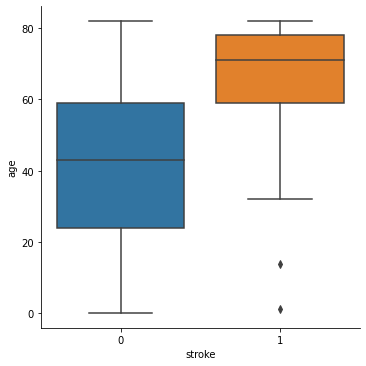

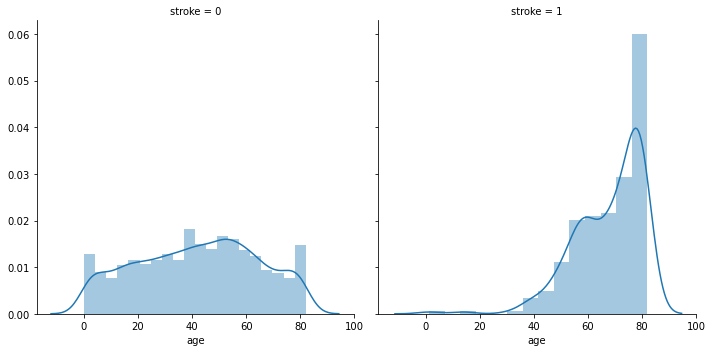

In [9]:
# Explore Age attribute

print(strokedf.groupby('stroke')['age'].mean())

# Explore Age variable with respect to the stroke attribute
sns.catplot(x="stroke", y="age", kind="box", data=strokedf);

g = sns.FacetGrid(data=strokedf, col='stroke', height=5)
g.map(sns.distplot, 'age')
plt.show()


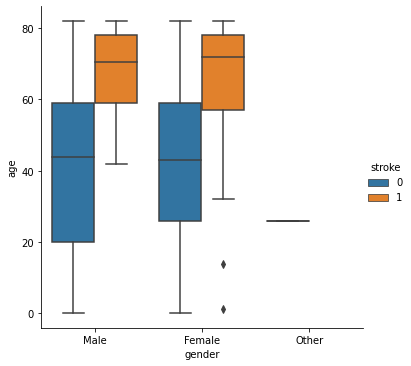

In [10]:
# Explore gender and age with respect to stroke and establish any conclusion

sns.catplot(x="gender", y="age", hue='stroke', kind="box", data=strokedf);

#### exploration - ever_married, work_type, Residence_type, smoking_status attributes

In [11]:
print("ever_married by the target variable")
print(strokedf.groupby('stroke')['ever_married'].value_counts())
print("\n")
print("work_type by the target variable")
print(strokedf.groupby('stroke')['work_type'].value_counts())
print("\n")
print("Residence_type by the target variable")
print(strokedf.groupby('stroke')['Residence_type'].value_counts())
print("\n")
print("smoking_status by the target variable")
print(strokedf.groupby('stroke')['smoking_status'].value_counts())

ever_married by the target variable
stroke  ever_married
0       Yes             3133
        No              1728
1       Yes              220
        No                29
Name: ever_married, dtype: int64


work_type by the target variable
stroke  work_type    
0       Private          2776
        Self-employed     754
        children          685
        Govt_job          624
        Never_worked       22
1       Private           149
        Self-employed      65
        Govt_job           33
        children            2
Name: work_type, dtype: int64


Residence_type by the target variable
stroke  Residence_type
0       Urban             2461
        Rural             2400
1       Urban              135
        Rural              114
Name: Residence_type, dtype: int64


smoking_status by the target variable
stroke  smoking_status 
0       never smoked       1802
        Unknown            1497
        formerly smoked     815
        smokes              747
1       never smoked   

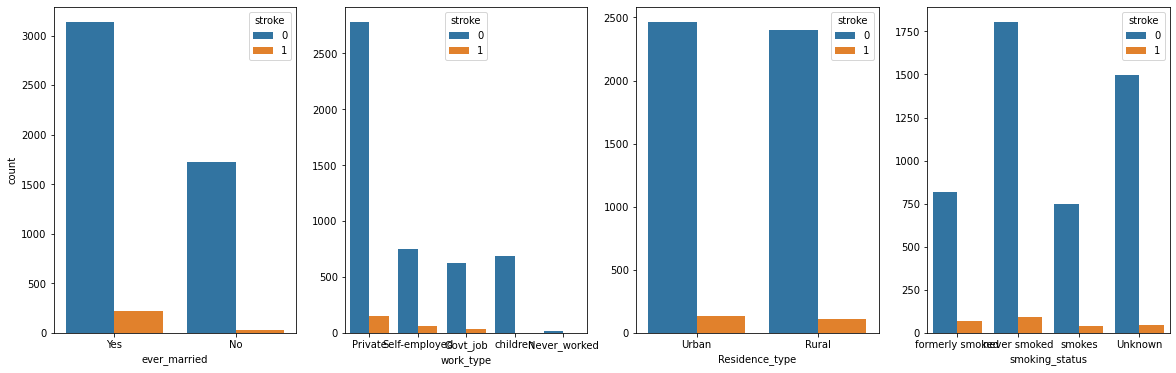

In [12]:

# Doing the visualizations

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,6))
sns.countplot(x='ever_married', hue='stroke', data=strokedf, ax=ax1);
sns.countplot(x='work_type', hue='stroke', data=strokedf, ax=ax2);
ax2.set_ylabel("")
sns.countplot(x='Residence_type', hue='stroke', data=strokedf, ax=ax3);
ax3.set_ylabel("")
sns.countplot(x='smoking_status', hue='stroke', data=strokedf, ax=ax4);
ax4.set_ylabel("")
plt.show()

#### Exploration avg_glucose_level

stroke
0    104.795513
1    132.544739
Name: avg_glucose_level, dtype: float64


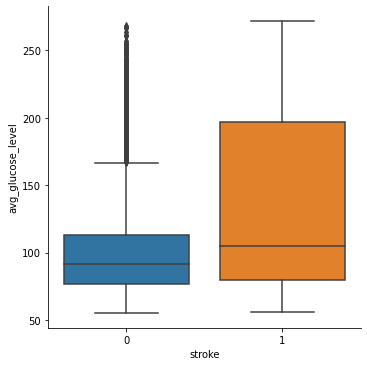

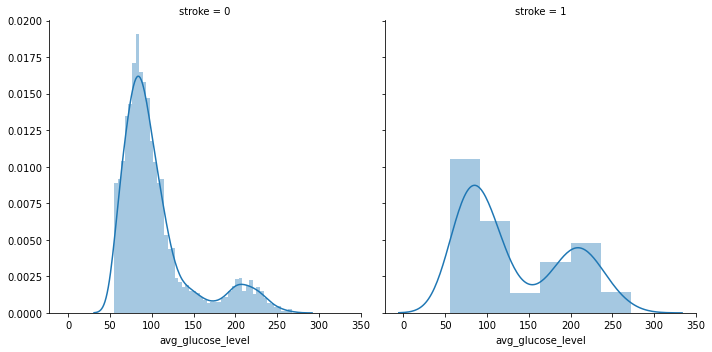

In [13]:

# Explore avg_glucose_level variable with respect to the stroke attribute

print(strokedf.groupby('stroke')['avg_glucose_level'].mean())

sns.catplot(x="stroke", y="avg_glucose_level", kind="box", data=strokedf);

g = sns.FacetGrid(data=strokedf, col='stroke', height=5)
g.map(sns.distplot, 'avg_glucose_level')
plt.show()

#### Exploration bmi attribute

stroke
0    28.823064
1    30.471292
Name: bmi, dtype: float64


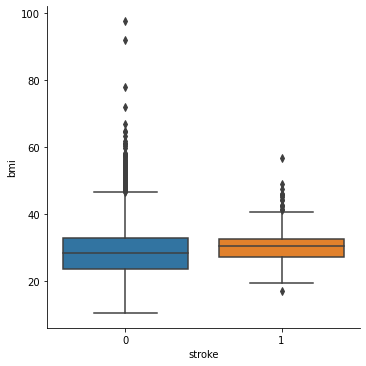

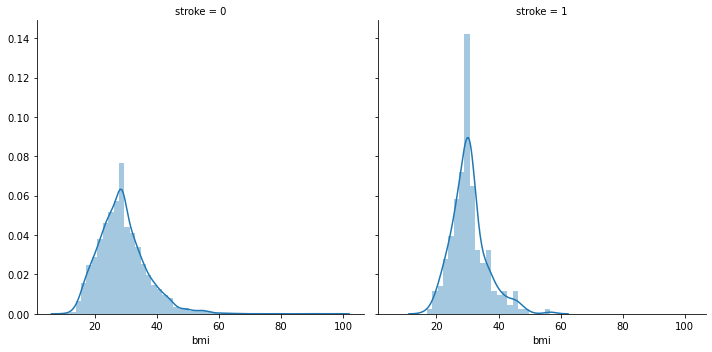

In [14]:
# Explore bmi variable with respect to the stroke attribute

print(strokedf.groupby('stroke')['bmi'].mean())

sns.catplot(x="stroke", y="bmi", kind="box", data=strokedf);

g = sns.FacetGrid(data=strokedf, col='stroke', height=5)
g.map(sns.distplot, 'bmi')
plt.show()

## Modelling - Random Forest

### Perform Label Enconder transformations

In [15]:

# Initialize the label encoder
label_encoder = LabelEncoder() 

# Encode labels 
strokedf['gender'] = label_encoder.fit_transform(strokedf['gender'])
strokedf['ever_married'] = label_encoder.fit_transform(strokedf['ever_married'])
strokedf['work_type'] = label_encoder.fit_transform(strokedf['work_type'])
strokedf['Residence_type'] = label_encoder.fit_transform(strokedf['Residence_type'])
strokedf['smoking_status'] = label_encoder.fit_transform(strokedf['smoking_status'])

### Perform Train , Test Split of the data

Since proportion of the stroke data is less, we will perform a stratified sampling

In [16]:
features = strokedf.drop('stroke', axis=1)
target = strokedf['stroke']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.3, random_state=101,
                                                                           stratify = target)

### Building the Model

In [17]:
# Training the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# we will build the random forest classifier both using entropy and gini index
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc.fit(features_train, target_train)

RandomForestClassifier(criterion='entropy')

### Predictions and Evaluations

In [19]:
predictions = rfc.predict(features_test)

print("Confusion Matrix - Random Forest Using Entropy Index\n")
print(confusion_matrix(target_test,predictions))
print("\n")
print("Classification Report \n")
print(classification_report(target_test,predictions))
print("\n")
print("Accuracy Score \n")
print(accuracy_score(target_test, predictions))
print("\n")
print("F1 Score \n")
print(f1_score(target_test, predictions))



Confusion Matrix - Random Forest Using Entropy Index

[[1458    0]
 [  74    1]]


Classification Report 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1458
           1       1.00      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.98      0.51      0.50      1533
weighted avg       0.95      0.95      0.93      1533



Accuracy Score 

0.9517286366601435


F1 Score 

0.02631578947368421
